benutzt die Channel Data Daten um den prozentualen anstieg der gesamt Views jedes Channels darzustellen

c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\vtphm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


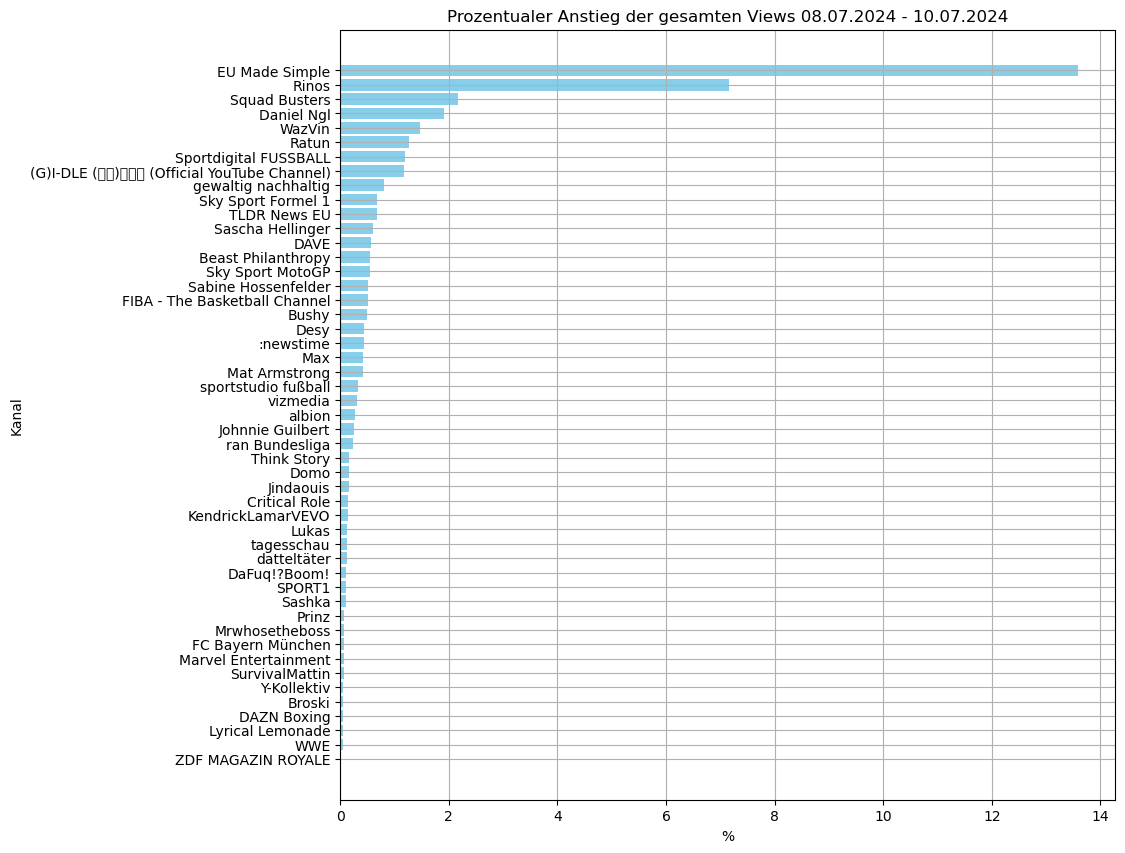

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

directory = 'channel_data'

channel_data = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        
        if len(data) > 1:
            # Extrahiere den ersten und letzten views-eintrag jedes kanals
            first_entry = data[0]
            last_entry = data[-1]
            
            # Extrahiere die timestamps
            first_timestamp = pd.to_datetime(first_entry['timestamp'].split('_')[0], format='%Y-%m-%d')
            last_timestamp = pd.to_datetime(last_entry['timestamp'].split('_')[0], format='%Y-%m-%d')
            
            # Formatierung des zeitraums für den titel im plot
            date_format = '%d.%m.%Y'
            date_range = f"{first_timestamp.strftime(date_format)} - {last_timestamp.strftime(date_format)}"
            
            # bereinigung
            first_views = int(first_entry['views'].replace('.', ''))
            last_views = int(last_entry['views'].replace('.', ''))

            # berechnung
            percent_increase = ((last_views - first_views) / first_views) * 100
            
            channel_data.append({'Kanal': first_entry['channel_name'], 'percent_increase': percent_increase, 'first_views': first_views, 'last': last_views})

df = pd.DataFrame(channel_data)

df = df.sort_values(by='percent_increase')

plt.figure(figsize=(10, 10))

plt.barh(df['Kanal'], df['percent_increase'], color='skyblue')

plt.ylabel('Kanal')
plt.xlabel('%')
plt.grid(True)
plt.title(f'Prozentualer Anstieg der gesamten Views {date_range}')

plt.show()
